In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv("../data/deaths08.csv")
dataset.head()

,yob,mob,dob,sex,age_unit,age,nation,marital,stateL,countyL,...,year_reg,mon_reg,day_reg,weight,year_cert,mon_cert,day_cert,pregnant,labor_cod,labor_c
0,1918,0,0,1,A,90,1,2,1,1,...,2008,1,8,8888,2008,1,7,8,8,8
1,1936,0,0,1,A,72,1,2,1,1,...,2008,1,14,8888,2008,1,13,8,8,8
2,1959,0,0,1,A,49,1,5,33,0,...,2008,1,17,8888,2008,1,12,8,8,8
3,1929,0,0,2,A,79,1,5,1,1,...,2008,1,21,8888,2008,1,20,8,8,8
4,1993,0,0,1,A,15,1,1,1,1,...,2008,1,2,8888,2008,1,1,8,8,8


In [34]:
dataset.hod.unique()

array([20, 14, 10, 15, 22,  1,  4, 18, 17, 21, 13,  3,  6, 23,  9,  5, 16,
       12,  0, 11,  7, 19,  8,  2, 24, 99], dtype=int64)

In [35]:
dataset["hod"].replace(to_replace=99, value=np.nan, inplace=True)
dataset["hod"].replace(to_replace=0, value=24, inplace=True)
# dataset["hod"].replace(to_replace=24, value=np.nan, inplace=True)

In [36]:
dataset.hod.unique()

array([20., 14., 10., 15., 22.,  1.,  4., 18., 17., 21., 13.,  3.,  6.,
       23.,  9.,  5., 16., 12., 24., 11.,  7., 19.,  8.,  2., nan])

In [37]:
dataset.yod.unique()

array([2008, 2007, 2000,    0, 2005, 2006, 2004, 1991, 1931, 1992, 2002,
       2003, 1995, 1996, 1997, 2001, 1999, 1993, 1998, 1983, 1979, 1930,
       1988, 1984, 1978, 1975, 1982, 1977, 1986, 1994, 1990, 1964, 1985,
       1944, 1989, 1955, 1980, 1950, 1966, 1968, 1981, 1976, 1962, 1941,
       1953, 1987, 1954, 1961, 1934, 1973, 1970, 1972, 1929, 1935, 1939,
       1947, 1943, 1965, 1958, 1952, 1967, 1969, 1974, 1926, 1971, 1942,
       1945, 1923, 1940, 1957, 1956, 1948, 1920, 1959, 1938, 1928, 1921,
       1936, 1932, 1960, 1907], dtype=int64)

In [38]:
subset = dataset.loc[(dataset['yod'] == 2008) & (dataset['mod'] != 0) & (dataset["dod"] != 0) & dataset["hod"] != np.nan]
print(len(subset))
subset.head()

539530


,yob,mob,dob,sex,age_unit,age,nation,marital,stateL,countyL,...,year_reg,mon_reg,day_reg,weight,year_cert,mon_cert,day_cert,pregnant,labor_cod,labor_c
0,1918,0,0,1,A,90,1,2,1,1,...,2008,1,8,8888,2008,1,7,8,8,8
1,1936,0,0,1,A,72,1,2,1,1,...,2008,1,14,8888,2008,1,13,8,8,8
2,1959,0,0,1,A,49,1,5,33,0,...,2008,1,17,8888,2008,1,12,8,8,8
3,1929,0,0,2,A,79,1,5,1,1,...,2008,1,21,8888,2008,1,20,8,8,8
4,1993,0,0,1,A,15,1,1,1,1,...,2008,1,2,8888,2008,1,1,8,8,8


In [39]:
subset.yod.unique()

array([2008, 2007, 2000,    0, 2005, 2006, 2004, 1991, 1931, 1992, 2002,
       2003, 1995, 1996, 1997, 2001, 1999, 1993, 1998, 1983, 1979, 1930,
       1988, 1984, 1978, 1975, 1982, 1977, 1986, 1994, 1990, 1964, 1985,
       1944, 1989, 1955, 1980, 1950, 1966, 1968, 1981, 1976, 1962, 1941,
       1953, 1987, 1954, 1961, 1934, 1973, 1970, 1972, 1929, 1935, 1939,
       1947, 1943, 1965, 1958, 1952, 1967, 1969, 1974, 1926, 1971, 1942,
       1945, 1923, 1940, 1957, 1956, 1948, 1920, 1959, 1938, 1928, 1921,
       1936, 1932, 1960, 1907], dtype=int64)

(15000, 25599.0)

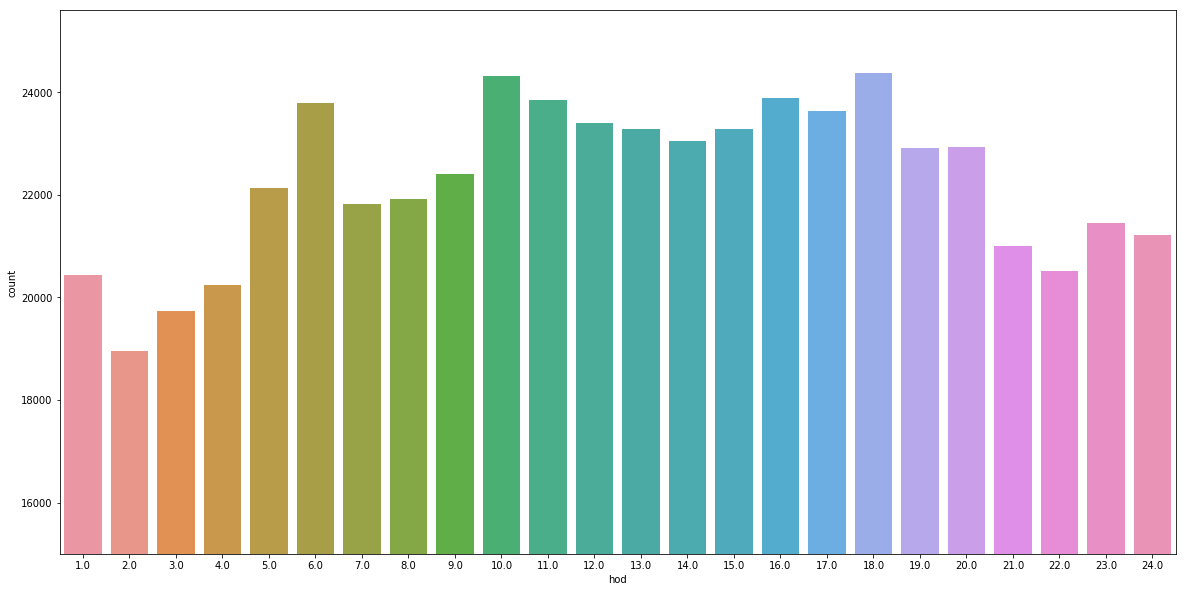

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="hod", data=subset)
ax.set_ylim(bottom=15000)

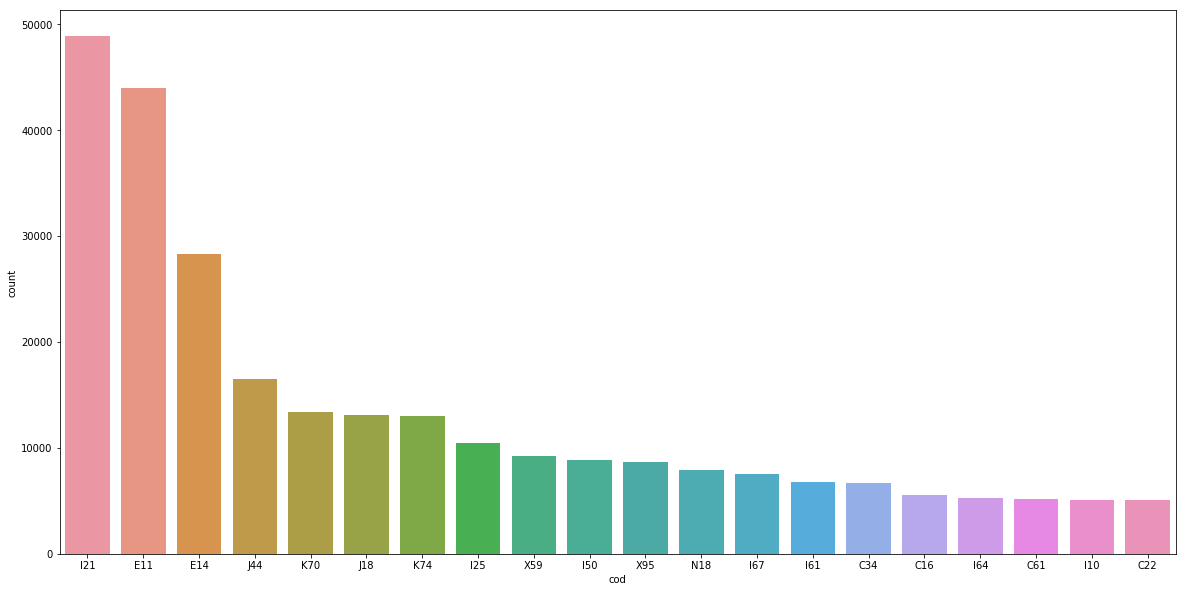

In [45]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="cod", data=subset, order=subset.cod.value_counts().iloc[:20].index)